In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset=pd.read_csv('../python-ml-course/datasets/wine/winequality-red.csv',sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

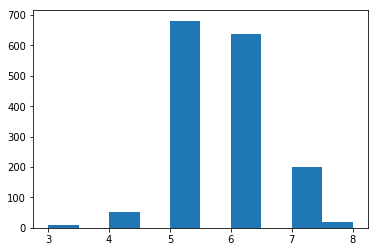

In [4]:
plt.hist(dataset['quality'])

## Normalizar dataset

In [5]:
dataset_norm=(dataset-dataset.min())/(dataset.max()-dataset.min())
dataset_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Crear Clusters

In [9]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [10]:
clusters=linkage(dataset_norm,'ward')
clusters

array([[0.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.35000000e+02, 1.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.50000000e+02, 7.51000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.17900000e+03, 3.19100000e+03, 6.43793061e+00, 5.37000000e+02],
       [3.19200000e+03, 3.19300000e+03, 8.26055739e+00, 1.06200000e+03],
       [3.19400000e+03, 3.19500000e+03, 1.20043330e+01, 1.59900000e+03]])

## Dendograma Truncado

<function matplotlib.pyplot.show(*args, **kw)>

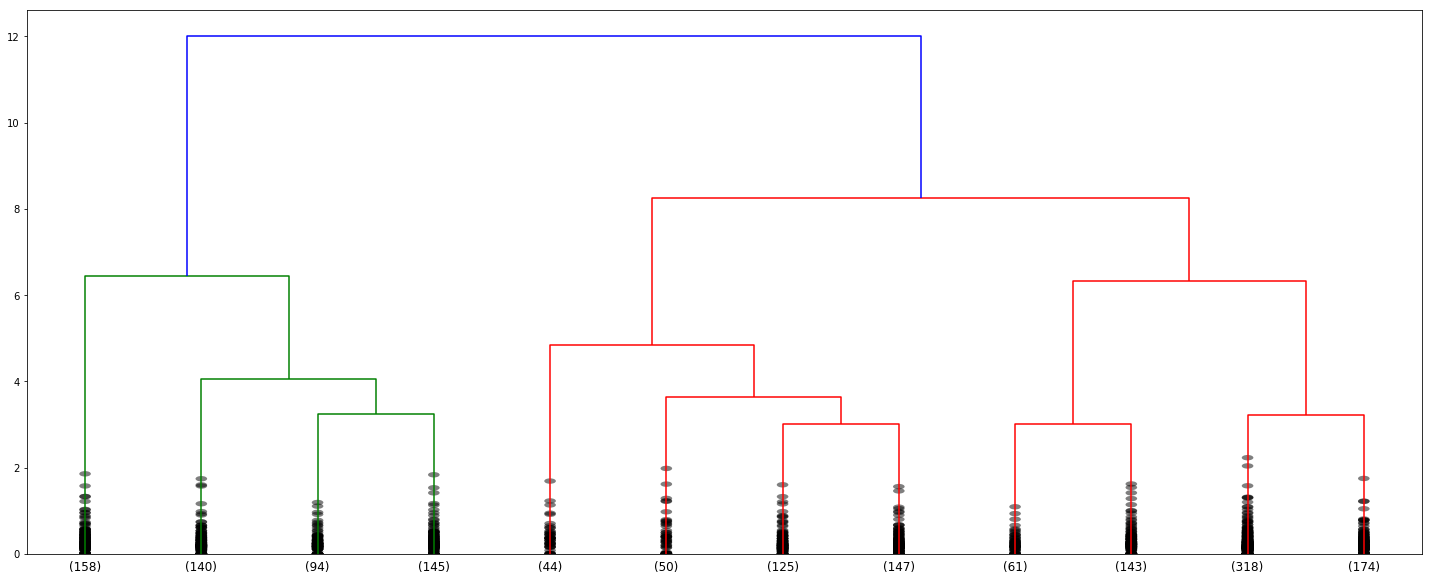

In [18]:
plt.figure(figsize=(25,10))
dendrogram(clusters,truncate_mode='lastp',p=12,show_contracted=True)
plt.show

## Obtener numero optimo de clusters

In [17]:
distancias=clusters[:,2]
def max_diff(dist_clusters):
    diff_clusters=np.diff(dist_clusters)
    max=0
    for index_i,i in enumerate(diff_clusters):
        if(i>max):
            max=i
            idx=index_i
        for index_j,j in enumerate(diff_clusters):
            if(j>max):
                max=j
                idx=index_j
    return (dist_clusters[idx])

max_d=round(max_diff(distancias),2)
max_d

8.26

In [20]:
from scipy.cluster.hierarchy import fcluster
clust_min=fcluster(clusters,max_d,criterion='distance')
max(clust_min)

3

## Representacion de Datos